### Thera Bank Personal Loan Campaign

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

<b>Data Dictionary</b>:

 ID: Customer ID <br>
 Age: Customer's age in completed years<br>
 Experience: #years of professional experience<br>
 Income: Annual income of the customer (In Thousands)<br>
 ZIP Code: Home Address ZIP code.<br>
 Family: Family size of the customer<br>
 CCAvg: Avg. spending on credit cards per month (In Thousands)<br>
 Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional<br>
 Mortgage: Value of house mortgage if any. (In Thousands)<br>
 Personal Loan: Did this customer accept the personal loan offered in the last campaign?<br>
 Securities Account: Does the customer have a securities account with the bank?<br>
 CD Account: Does the customer have a certificate of deposit (CD) account with the bank?<br>
 Online: Does the customer use internet banking facilities?<br>
 Credit card: Does the customer use a credit card issued by the bank?<br>

## Q1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

## Load and review data

In [2]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
pdata.shape # Check number of columns and rows in data frame

(5000, 14)

In [4]:
pdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
pdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
pdata.head() # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
pdata.isnull().values.any() # If there are any null values in data set

False

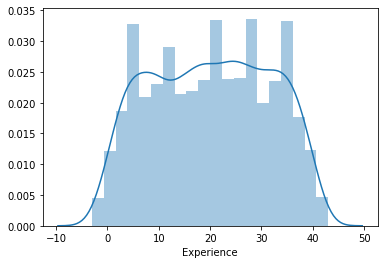

In [8]:
sns.distplot(pdata['Experience']);

In [9]:
# removing -ve Experince rows with ZERO
pdata['Experience'].replace([-3,-2,-1], 0,inplace=True)

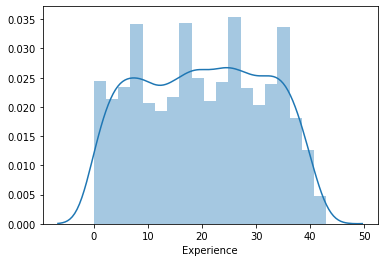

In [10]:
sns.distplot(pdata['Experience']);

## Q2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks) 
 Number of unique in each column? <br>
 Number of people with zero mortgage? <br>
 Number of people with zero credit card spending per month?<br>
 Value counts of all categorical columns.<br>
 Univariate and Bivariate<br>
 Get data model ready<br>

In [11]:
pdata.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
ZeroMt = pdata.loc[pdata["Mortgage"] == 0, "Mortgage"]
print('Number of people with zero mortgage:', ZeroMt.count())

Number of people with zero mortgage: 3462


In [13]:
#Assuming people with No Credit Card have ZERO spending
ZeroCcd = pdata.loc[pdata["CreditCard"] == 0, "CreditCard"]
print('Number of people with zero credit card spending per month:', ZeroCcd.count())

Number of people with zero credit card spending per month: 3530


In [14]:
pdata.groupby('Family')['Family'].count()

Family
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

In [15]:
pdata.groupby('Education')['Education'].count()

Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64

In [16]:
pdata.groupby('Personal Loan')['Personal Loan'].count()

Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
pdata.groupby('Securities Account')['Securities Account'].count()

Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64

In [18]:
pdata.groupby('CD Account')['CD Account'].count()

CD Account
0    4698
1     302
Name: CD Account, dtype: int64

In [19]:
pdata.groupby('Online')['Online'].count()

Online
0    2016
1    2984
Name: Online, dtype: int64

In [20]:
pdata.groupby('CreditCard')['CreditCard'].count()

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

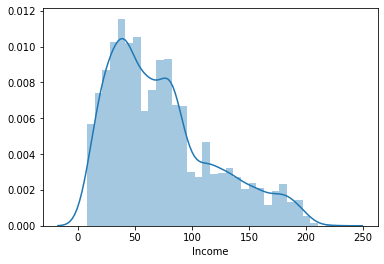

In [21]:
sns.distplot(pdata['Income']);

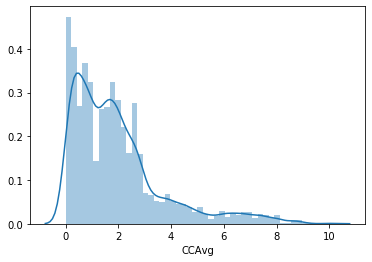

In [22]:
sns.distplot(pdata['CCAvg']);

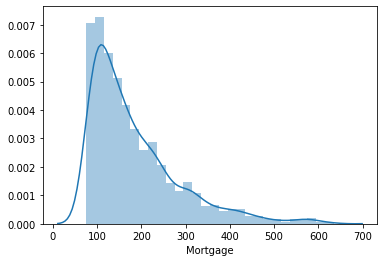

In [23]:
NonZeroMt = pdata.loc[pdata["Mortgage"] > 0, "Mortgage"]
sns.distplot(NonZeroMt)

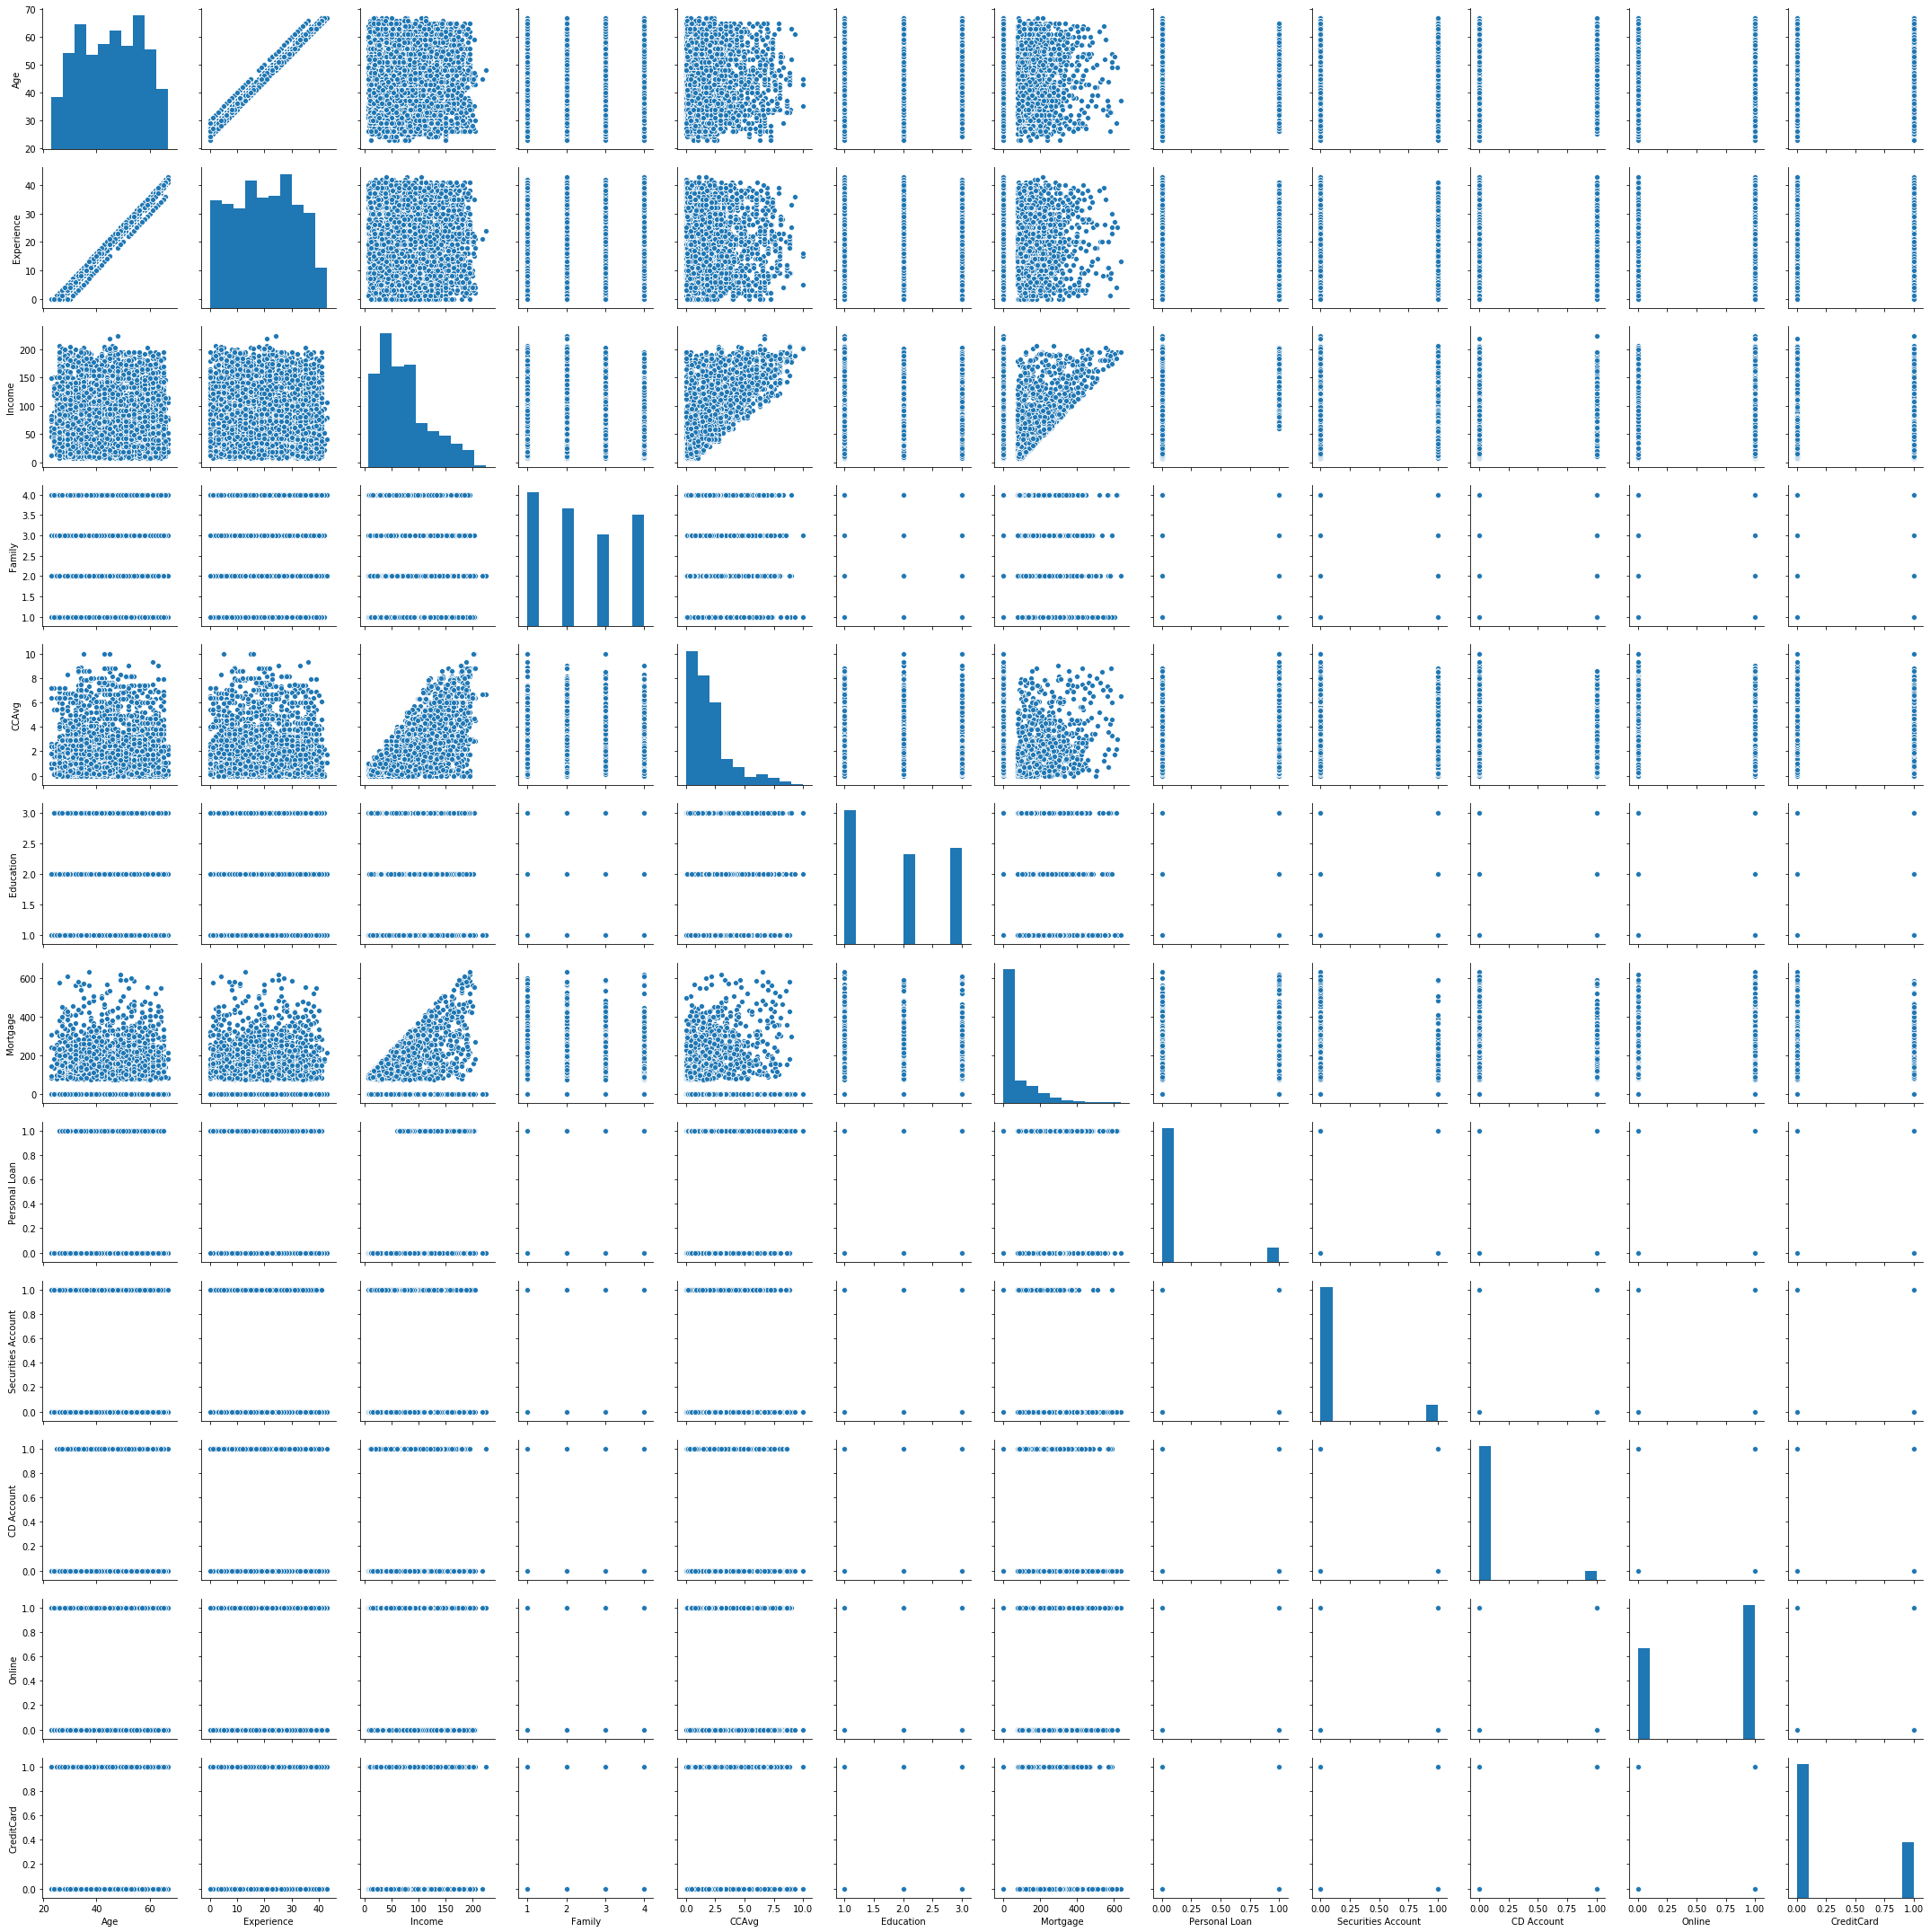

In [24]:
#sns.pairplot(pdata,diag_kind='kde')
sns.pairplot(pdata[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']])

In [26]:
pdata.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [27]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=16):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


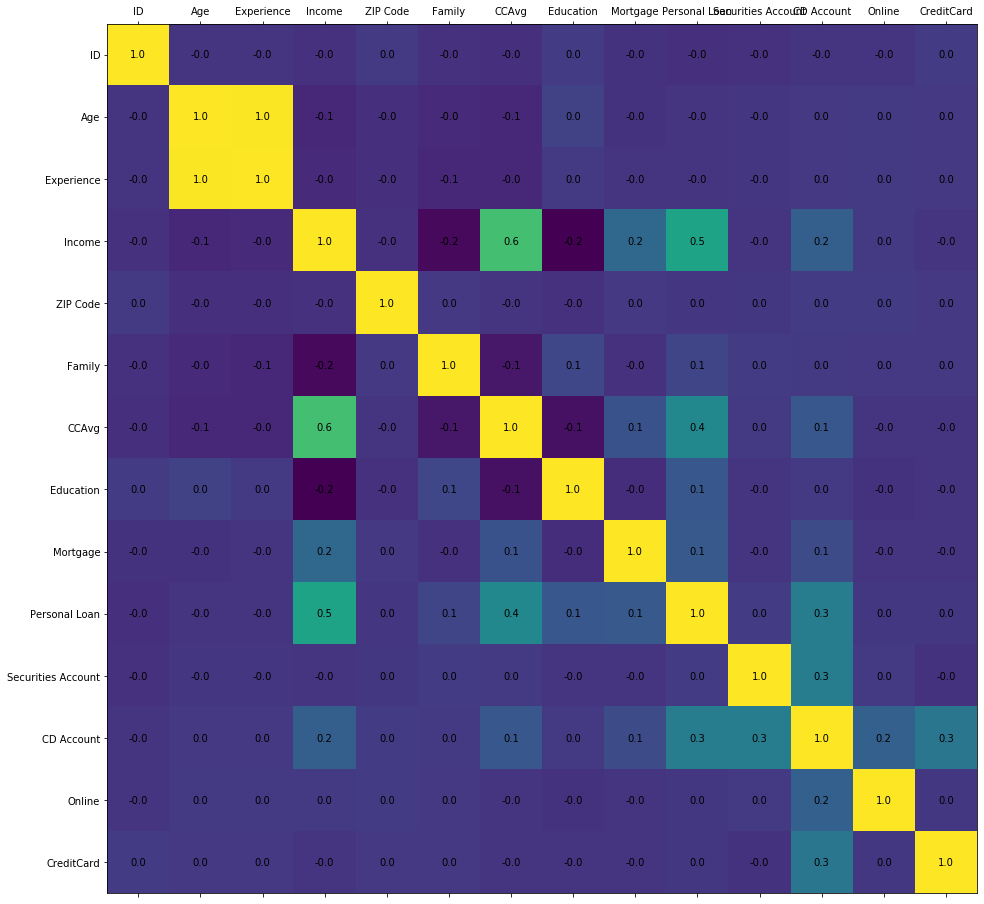

In [28]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

# Data Preparation

### Remove unwanted columns for the model

Remove ID & ZIP Code

In [29]:
pdata.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [30]:
pdata.drop(['ZIP Code'], axis=1, inplace=True)
pdata.drop(['ID'], axis=1, inplace=True)

## Q3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [31]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Personal Loan',axis=1)     # Predictor feature columns
Y = pdata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


Lets check split of data

In [32]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check True/False ratio in split data 

In [33]:
print("Original PL True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 1]), (len(pdata.loc[pdata['Personal Loan'] == 1])/len(pdata.index)) * 100))
print("Original PL False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 0]), (len(pdata.loc[pdata['Personal Loan'] == 0])/len(pdata.index)) * 100))
print("")
print("Training PL True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training PL False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test PL True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PL False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original PL True Values    : 480 (9.60%)
Original PL False Values   : 4520 (90.40%)

Training PL True Values    : 331 (9.46%)
Training PL False Values   : 3169 (90.54%)

Test PL True Values        : 149 (9.93%)
Test PL False Values       : 1351 (90.07%)



# Q4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

In [34]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for Age is -0.3997748341088135
The coefficient for Experience is 0.3991952802245534
The coefficient for Income is 0.048906773065495054
The coefficient for Family is 0.6445168106333257
The coefficient for CCAvg is 0.16233806008056675
The coefficient for Education is 1.6400428586383782
The coefficient for Mortgage is 0.0007881749644148874
The coefficient for Securities Account is -0.8604172796565024
The coefficient for CD Account is 3.2127784826612955
The coefficient for Online is -0.5715964227218227
The coefficient for CreditCard is -0.9894881600277845
The intercept for our model is -2.4890522857477273


In [35]:
model_score = model.score(x_test, y_test)
print(model_score)

0.946


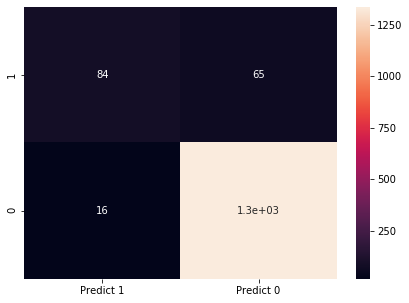

In [36]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have Personal Load 84

True Negatives (TN): we correctly predicted that they don't have Personal Load 1335

False Positives (FP): we incorrectly predicted that they do have Personal Load (a "Type I error") 16 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have Personal Load (a "Type II error") 65 Falsely predict negative Type II error

# Q5. Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameter

In [37]:
from sklearn.model_selection import train_test_split

#dropping Education & Family to generalize the model
X = pdata[['Age','Experience','Income','CCAvg','Mortgage','Securities Account','CD Account','Online','CreditCard']]     # Predictor feature columns
Y = pdata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

In [39]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9193333333333333


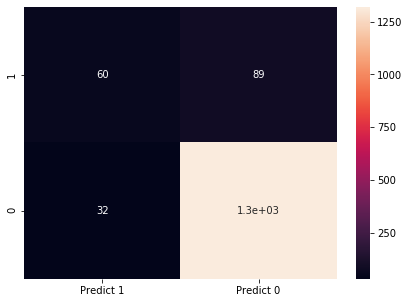

In [40]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Answer 5. Improve model performance 
The general approach to improving model performance is by dropping columns that have very little correlation. The following paramerts were dropped.
-- Education          
-- Family                 

Feature Sandardization is also a great a another way to improve model perfromance. By reducing the values to a smaller scale the impact of outliers is reduced and the computation runs much faster for smaller values and perfroms better.

A simpler model does NOT overfit the data and provides better results for UNSEEN data

# Q6. Give Business understanding of your model? (5 marks)

In [41]:
pdata.groupby('Personal Loan').mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.148894,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


So people with higher 
1. Income
2. Avg. spending on credit cards per month
3. Mortgage <br>  <br>
Have taken a Personal Loan